<a href="https://colab.research.google.com/github/Nickqq627/7112029017/blob/main/week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf


# 下載台積電股價數據
def get_stock_data():
    ticker = "2330.TW"
    data = yf.download(ticker, start="2020-01-01", end="2024-10-01")
    return data

## 1. 使用 LSTM 模型預測股票未來價格，自訂窗口大小，並分析預測效果。


In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import datetime

# 下載台積電股價數據
def get_stock_data():
    ticker = "2330.TW"
    data = yf.download(ticker, start="2020-01-01", end="2024-10-01")
    return data

# 資料預處理
def preprocess_data(data, time_steps=20):
    # 僅保留收盤價
    closing_prices = data['Close'].values
    closing_prices = closing_prices.reshape(-1, 1)

    # 使用 MinMaxScaler 進行標準化
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(closing_prices)

    # 創建時間步長資料集
    X, y = [], []
    for i in range(time_steps, len(scaled_data)):
        X.append(scaled_data[i-time_steps:i, 0])
        y.append(scaled_data[i, 0])

    X = np.array(X)
    y = np.array(y)

    # 重塑 X 為 (samples, time_steps, features)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    return X, y, scaler

# 建立 LSTM 模型
def create_lstm_model(input_shape):
  # Build the LSTM model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(32))
    model.add(Dense(16))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# 下載股價資料
data = get_stock_data()

# 資料預處理
X, y, scaler = preprocess_data(data)

# 訓練/測試資料分割
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 建立並訓練 LSTM 模型
model = create_lstm_model((X_train.shape[1], 1))
model.fit(X_train, y_train, epochs=100, batch_size=32)

# 預測未來收盤價
predictions = model.predict(X_test)

# 反標準化
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))
predictions = scaler.inverse_transform(predictions)

# 計算均方誤差
mse = mean_squared_error(y_test_scaled, predictions)
print(f"均方誤差 (MSE): {mse}")

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0336
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0018
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 7.3365e-04
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 6.0498e-04
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 5.8785e-04
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 6.6270e-04
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 5.1909e-04
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 5.5864e-04
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 5.2637e-04
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.9232e-04
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.5524e-04
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.4680e-04
Epoch 13/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.3060e-04
Epoch 14/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.3992e-04
Epoch 15/

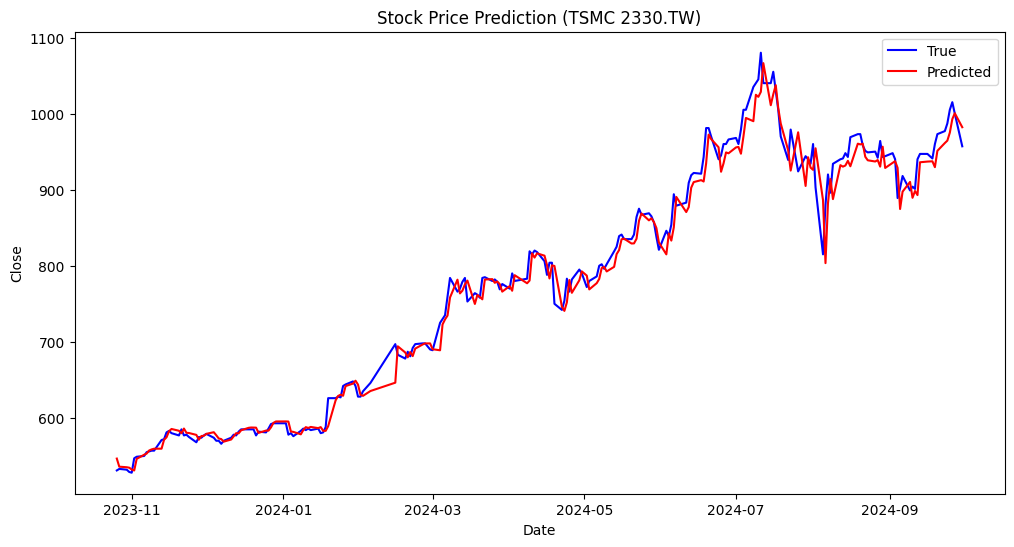

In [3]:
# 6. 視覺化結果
test_dates = data.index[-len(y_test_scaled):]  # 測試集日期
plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_test_scaled, color='blue', label='True')
plt.plot(test_dates, predictions, color='red', label='Predicted')
plt.title('Stock Price Prediction (TSMC 2330.TW)')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()

## 2. 使用 Transformer 模型預測股價漲跌，自訂窗口大小，並分析預測結果。

In [6]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import datetime
import torch
import torch.nn as nn
import math

# 下載台積電股價數據
def get_stock_data():
    ticker = "2330.TW"
    data = yf.download(ticker, start="2020-01-01", end="2024-10-01")
    data = data[['Adj Close']]
    data.rename(columns={'Adj Close': 'Close'}, inplace=True)
    return data


scaler = MinMaxScaler(feature_range=(0, 1))
data['Close'] = scaler.fit_transform(data[['Close']])

# 建立 Transformer 模型
def create_transformer_model(input_shape):
    # 使用 Functional API 定義模型
    inputs = Input(shape=input_shape)

    # Dense 層處理輸入
    x = Dense(64)(inputs)
    x = Dropout(0.1)(x)

    # 使用 MultiHeadAttention 層
    attention_output = MultiHeadAttention(num_heads=4, key_dim=64)(x, x)
    x = LayerNormalization()(attention_output)
    x = Dropout(0.2)(x)

    # 全連接層
    x = Dense(32, activation='relu')(x)
    x = Dense(16, activation='relu')(x)

    # 輸出層
    output = Dense(1)(x)

    # 定義模型
    model = Model(inputs=inputs, outputs=output)

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# 1. 下載股價資料
data = get_stock_data()

scaler = MinMaxScaler(feature_range=(0, 1))
data['Close'] = scaler.fit_transform(data[['Close']])

def create_sequences(dataset, lookback=20):
    X, y = [], []
    for i in range(len(dataset) - lookback):
        X.append(dataset[i:(i + lookback), 0])
        y.append(dataset[i + lookback, 0])
    return np.array(X), np.array(y)

# 轉換為 numpy 陣列
dataset = data.values

# 定義 lookback 窗口大小
lookback = 20

X, y = create_sequences(dataset, lookback)

# 劃分比例
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size

X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]

# 將數據轉換為 PyTorch 張量
X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).float()
X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test).float()

# 調整輸入形狀為 (seq_length, batch_size, feature_size)
X_train_tensor = X_train_tensor.unsqueeze(-1).permute(1, 0, 2)
X_test_tensor = X_test_tensor.unsqueeze(-1).permute(1, 0, 2)

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        # 建立一個位置編碼矩陣
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1).float()
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)  # 偶數位置
        pe[:, 1::2] = torch.cos(position * div_term)  # 奇數位置
        pe = pe.unsqueeze(1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        # x 的形狀為 (seq_length, batch_size, d_model)
        x = x + self.pe[:x.size(0)]
        return x

class TransformerTimeSeries(nn.Module):
    def __init__(self, feature_size=1, num_layers=2, nhead=4, hidden_dim=128, dropout=0.1):
        super(TransformerTimeSeries, self).__init__()
        self.model_type = 'Transformer'
        self.input_linear = nn.Linear(feature_size, hidden_dim)  # 新增的線性層
        self.pos_encoder = PositionalEncoding(d_model=hidden_dim)
        encoder_layers = nn.TransformerEncoderLayer(d_model=hidden_dim, nhead=nhead, dim_feedforward=hidden_dim, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers=num_layers)
        self.decoder = nn.Linear(hidden_dim, 1)
        self.hidden_dim = hidden_dim

    def forward(self, src):
        # src 形狀: (seq_length, batch_size, feature_size)
        src = self.input_linear(src)  # 將輸入映射到 hidden_dim 維度
        src = self.pos_encoder(src)
        output = self.transformer_encoder(src)
        # 取最後一個時間步的輸出
        output = self.decoder(output[-1, :, :])
        return output

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'使用設備：{device}')

feature_size = 1  # 輸入特徵數
num_layers = 2
nhead = 4
hidden_dim = 128

model = TransformerTimeSeries(feature_size=feature_size, num_layers=num_layers, nhead=nhead, hidden_dim=hidden_dim).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
X_train_tensor = X_train_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)
X_test_tensor = X_test_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)

num_epochs = 100
batch_size = X_train_tensor.size(1)

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output.squeeze(), y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 5 == 0:
        model.eval()
        with torch.no_grad():
            test_output = model(X_test_tensor)
            test_loss = criterion(test_output.squeeze(), y_test_tensor)
        print(f'Epoch [{epoch + 1}/{num_epochs}], 訓練集 Loss: {loss.item():.4f}, 測試集 Loss: {test_loss.item():.4f}')

model.eval()
with torch.no_grad():
    train_predict = model(X_train_tensor).cpu().numpy()
    test_predict = model(X_test_tensor).cpu().numpy()

# 反歸一化
train_predict = scaler.inverse_transform(train_predict)
y_train_actual = scaler.inverse_transform(y_train_tensor.cpu().numpy().reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict)
y_test_actual = scaler.inverse_transform(y_test_tensor.cpu().numpy().reshape(-1, 1))

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


使用設備：cpu
Epoch [5/100], 訓練集 Loss: 0.8082, 測試集 Loss: 0.2757
Epoch [10/100], 訓練集 Loss: 0.1584, 測試集 Loss: 0.6081
Epoch [15/100], 訓練集 Loss: 0.0193, 測試集 Loss: 0.0615
Epoch [20/100], 訓練集 Loss: 0.0735, 測試集 Loss: 0.0467
Epoch [25/100], 訓練集 Loss: 0.0393, 測試集 Loss: 0.2581
Epoch [30/100], 訓練集 Loss: 0.0171, 測試集 Loss: 0.1018
Epoch [35/100], 訓練集 Loss: 0.0297, 測試集 Loss: 0.0557
Epoch [40/100], 訓練集 Loss: 0.0167, 測試集 Loss: 0.1366
Epoch [45/100], 訓練集 Loss: 0.0150, 測試集 Loss: 0.0948
Epoch [50/100], 訓練集 Loss: 0.0157, 測試集 Loss: 0.0583
Epoch [55/100], 訓練集 Loss: 0.0128, 測試集 Loss: 0.0850
Epoch [60/100], 訓練集 Loss: 0.0110, 測試集 Loss: 0.0633
Epoch [65/100], 訓練集 Loss: 0.0099, 測試集 Loss: 0.0469
Epoch [70/100], 訓練集 Loss: 0.0091, 測試集 Loss: 0.0497
Epoch [75/100], 訓練集 Loss: 0.0082, 測試集 Loss: 0.0340
Epoch [80/100], 訓練集 Loss: 0.0073, 測試集 Loss: 0.0283
Epoch [85/100], 訓練集 Loss: 0.0063, 測試集 Loss: 0.0190
Epoch [90/100], 訓練集 Loss: 0.0054, 測試集 Loss: 0.0113
Epoch [95/100], 訓練集 Loss: 0.0053, 測試集 Loss: 0.0066
Epoch [100/100], 訓練集 Lo

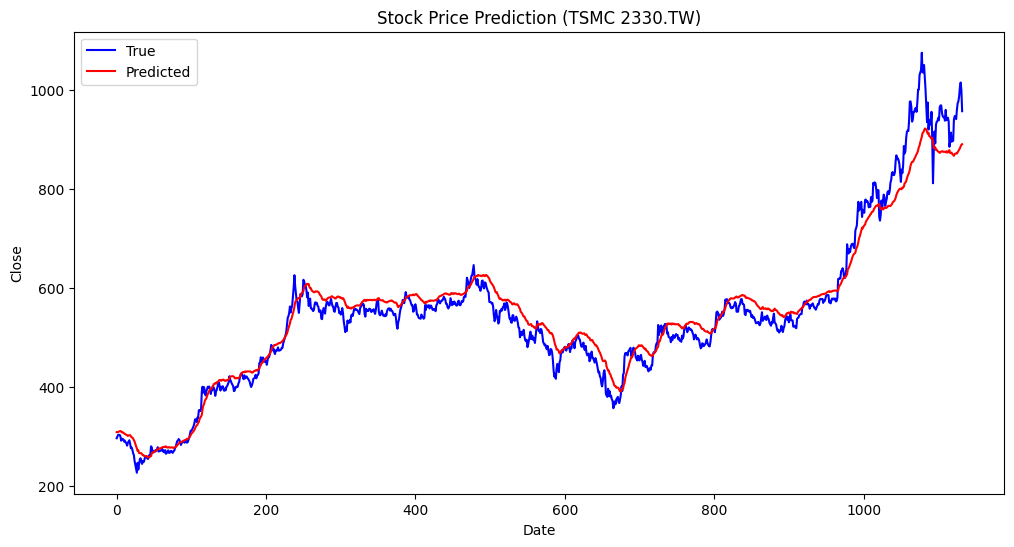

In [7]:
# 構建完整的時間序列
predicted = np.concatenate((train_predict, test_predict), axis=0)
actual = scaler.inverse_transform(dataset[lookback:])

plt.figure(figsize=(12,6))
plt.plot(actual, color='blue', label='True')
plt.plot(predicted, color='red', label='Predicted')
plt.title('Stock Price Prediction (TSMC 2330.TW)')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()

In [8]:
from sklearn.metrics import mean_squared_error

train_score = mean_squared_error(y_train_actual, train_predict)
test_score = mean_squared_error(y_test_actual, test_predict)
print(f'訓練集 MSE: {train_score:.2f}')
print(f'測試集 MSE: {test_score:.2f}')

訓練集 MSE: 581.36
測試集 MSE: 3235.22
